In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sp
import scipy.stats
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from scipy.stats.mstats import winsorize

In [4]:
df = pd.read_csv("final_data.csv")

In [5]:
#train_set와 test_set 나누기(random)
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(df) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]

    return df.iloc[train_indices], df.iloc[test_indices]


train_set, test_set = split_train_test(df, 0.3)
print(len(train_set), "train +", len(test_set), "test")

208 train + 88 test


In [6]:
train_set.to_csv("train_set8.csv")
test_set.to_csv("test_set8.csv")

In [7]:
train_set

,name,Date,Divedend_yield_ratio_growth,BPS_growth,PER_growth,EPS_growth,Profit_growth,Revenue_growth,W/L
74,lg_0,2019-09-30 0:00,10.457516,1.918828,4.850746,-25.917070,-41.09,-0.47,0
32,hyundai_32,2011-09-30 0:00,11.666667,13.740255,-27.843987,14.995860,32.41,21.01,0
64,gs_27,2012-12-28 0:00,2.976190,2.321282,-11.459075,7.897409,29.32,13.17,0
110,lg_36,2010-09-30 0:00,-7.317073,9.444113,2.557856,24.639709,-39.52,56.15,1
9,hyundai_9,2017-06-30 0:00,-2.590674,3.717923,10.869565,-5.954333,-13.44,0.78,1
...,...,...,...,...,...,...,...,...,...
198,samsung_13,2016-06-30 0:00,4.800000,-4.398554,12.603306,-19.269324,-5.75,3.48,1
149,posco_1,2019-06-28 0:00,21.846154,-2.792129,49.003021,-75.251453,10.79,7.38,0
210,samsung_25,2013-06-28 0:00,22.500000,0.294490,-25.127681,8.654484,77.39,16.44,0
17,hyundai_17,2015-06-30 0:00,39.634146,2.066650,0.787402,-14.788424,7.47,10.79,0


Text(0.5, 1.0, 'Unconditional correlation betwen X1 and Y')

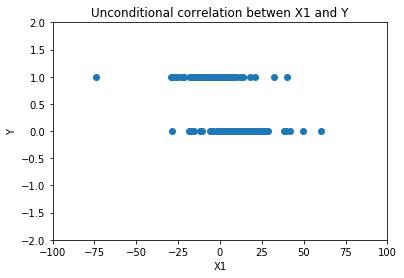

In [8]:
plt.figure()

#plt.subplot(121)
plt.scatter(df["Divedend_yield_ratio_growth"], df["W/L"])
plt.xlabel("X1")
plt.ylabel("Y")
plt.xlim(-100, 100)
plt.ylim(-2, 2)
plt.title("Unconditional correlation betwen X1 and Y")

In [12]:
#features_treain, labels_train
features_train = winsorize(train_set.iloc[:, 2:8], 0.05)
labels_train = winsorize(train_set.iloc[:, 8:], 0.05)

In [14]:
#featrues_test
features_test = winsorize(test_set.iloc[:, 2:8], 0.05)
labels_test = winsorize(test_set.iloc[:, 8:], 0.05)

In [15]:
#Classifier 선언
clf = GaussianNB()
#fit 함수가 training sample을 이용한 학습을 진행하는 과정
clf.fit(features_train, labels_train)


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [16]:
clf.predict_proba(features_test)   #w/Lclass prob [W,L]

array([[0.05982566, 0.94017434],
       [0.32590095, 0.67409905],
       [0.20227846, 0.79772154],
       [0.66544267, 0.33455733],
       [0.12582196, 0.87417804],
       [0.31653323, 0.68346677],
       [0.70163525, 0.29836475],
       [0.99194913, 0.00805087],
       [0.98649837, 0.01350163],
       [0.50241055, 0.49758945],
       [0.24539253, 0.75460747],
       [0.95115017, 0.04884983],
       [0.7820015 , 0.2179985 ],
       [0.95904377, 0.04095623],
       [0.81213957, 0.18786043],
       [0.47980959, 0.52019041],
       [0.4491436 , 0.5508564 ],
       [0.88015864, 0.11984136],
       [0.90738425, 0.09261575],
       [0.59038161, 0.40961839],
       [0.98169406, 0.01830594],
       [0.71047541, 0.28952459],
       [0.30605677, 0.69394323],
       [0.05641446, 0.94358554],
       [0.5744512 , 0.4255488 ],
       [0.1054928 , 0.8945072 ],
       [0.94738551, 0.05261449],
       [0.57713945, 0.42286055],
       [0.3077254 , 0.6922746 ],
       [0.32279597, 0.67720403],
       [0.

In [17]:
clf.predict_log_proba(features_test)  #predict prob 로그값 [winner, loser]

array([[-2.8163207 , -0.06168995],
       [-1.12116179, -0.39437822],
       [-1.59811   , -0.22599569],
       [-0.4073028 , -1.09494701],
       [-2.07288739, -0.13447122],
       [-1.15032705, -0.38057724],
       [-0.3543416 , -1.20943854],
       [-0.00808345, -4.82197525],
       [-0.01359361, -4.30494484],
       [-0.68833766, -0.69797995],
       [-1.40489619, -0.28155757],
       [-0.05008332, -3.01900434],
       [-0.24589863, -1.52326708],
       [-0.04181856, -3.19525135],
       [-0.20808308, -1.67205596],
       [-0.73436594, -0.65356036],
       [-0.80041263, -0.59628111],
       [-0.12765311, -2.12158643],
       [-0.09718927, -2.37929603],
       [-0.52698615, -0.89252932],
       [-0.01847556, -4.00052983],
       [-0.34182094, -1.23951506],
       [-1.18398467, -0.36536513],
       [-2.8750298 , -0.05806825],
       [-0.55434014, -0.85437564],
       [-2.2491126 , -0.11148232],
       [-0.05404918, -2.94476374],
       [-0.54967136, -0.86071283],
       [-1.17854744,

In [18]:
predict_class = clf.predict(features_test)  
predict_class

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1],
      dtype=int64)

In [19]:
#Accuracy test
#방법 1
from sklearn.metrics import accuracy_score
pred = clf.predict(features_test)    
accuracy = accuracy_score(pred, labels_test)    
print ("score using accuracy: ", accuracy)

score using accuracy:  0.7045454545454546


In [20]:
#방법 2
print ("score function(default:accuracy): ", clf.score(features_test, labels_test) )
#classification에서 score 함수는 accuracy 방법을 사용하기에 방법 1, 방법 2의 값은 같음

score function(default:accuracy):  0.7045454545454546


In [ ]:
#Attributes

#class_prior_	array, shape = [n_classes]	probability of each class.
#theta_	array, shape = [n_classes, n_features]	mean of each feature per class
#sigma_	array, shape = [n_classes, n_features]	variance of each feature per class
#Methods

#fit(X, y)	Fit Gaussian Naive Bayes according to X, y
#get_params([deep])	Get parameters for the estimator
#predict(X)	Perform classification on an array of test vectors X.
#predict_log_proba(X)	Return log-probability estimates for the test vector X.
#predict_proba(X)	Return probability estimates for the test vector X.
#score(X, y)	Returns the mean accuracy on the given test data and labels.
#set_params(**params)	Set the parameters of the estimator.